0.4; 0.36787944117144233


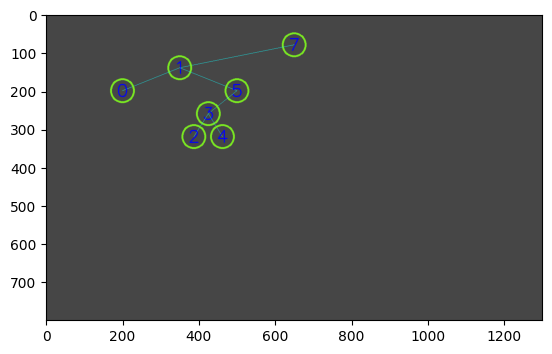

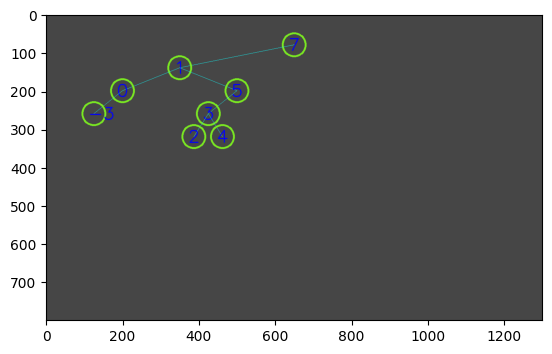

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

class Node:
    def __init__(self, key, val = None):
        self.key = key
        self.val = val
        self.l = None
        self.r = None
        self.p = None
    
    def draw(self, canvas, x0, y0, h, w, depth):
        cv2.circle(canvas, (x0, y0), 30, (123, 234, 34), 3)
        cv2.putText(canvas, str(self.key), (x0 - 15, y0 + 15), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 2)
        
        if (self.l is not None):
            x, y = int(x0 - w / 2**depth), y0 + h
            cv2.line(canvas, (x0, y0), (x, y), (23, 234, 234), 1)
            
            self.l.draw(canvas, x, y, h, w, depth + 1)
        
        if (self.r is not None):
            x, y = int(x0 + w / 2**depth), y0 + h
            cv2.line(canvas, (x0, y0), (x, y), (23, 234, 234), 1)
            
            self.r.draw(canvas, x, y, h, w, depth + 1)
    
class BST:
    def __init__(self):
        self.root = None
        self.elem_num = 0
    
    def find(self, key):
        curr = self.root
        
        while(curr is not None):
            if (curr.key == key):
                return curr.val
            
            elif (curr.key > key):
                curr = curr.l

            else:
                curr = curr.r
    
    def __len__(self):
        return self.elem_num
    
    def add(self, key, val = None):
        new_node = Node(key, val)
        
        if (self.root is None):
            self.root = new_node
            return
        
        curr = self.root
        
        self.elem_num += 1
        
        while(True):
            if (curr.key > key):
                if (curr.l is None):
                    new_node.p = curr
                    curr.l = new_node
                    return
                
                else:
                    curr = curr.l
            
            elif (curr.key < key):
                if (curr.r is None):
                    new_node.p = curr
                    curr.r = new_node
                    return
                
                else:
                    curr = curr.r
            
            else:
                #print(f"key {key} already in tree; ignoring")
                self.elem_num -= 1
                return
            
    #def delete(self, key):
        
    
    def draw(self, canvas, x0, y0, h, w):
        if (self.root is not None):
            self.root.draw(canvas, x0, y0, h, w, 0)

el_num = 10
bst = BST()

for i in range(el_num):
    bst.add(np.random.randint(el_num))

print(f"{1 - len(bst) / el_num}; {1 / np.e}")

WINDY, WINDX = 800, 1300
canvas = np.ones((WINDY, WINDX, 3), np.uint8) * 70
bst.draw(canvas, x0 = WINDX // 2, y0 = WINDY // 10, h = 60, w = 300)
plt.imshow(canvas)
plt.show()

bst.add(-3)
bst.draw(canvas, x0 = WINDX // 2, y0 = WINDY // 10, h = 60, w = 300)
plt.imshow(canvas)
